Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 0s - loss: 121.9127 - 274ms/epoch - 55ms/step
Epoch 2/100
5/5 - 0s - loss: 67.3555 - 4ms/epoch - 795us/step
Epoch 3/100
5/5 - 0s - loss: 51.5944 - 5ms/epoch - 1000us/step
Epoch 4/100
5/5 - 0s - loss: 44.5138 - 5ms/epoch - 1ms/step
Epoch 5/100
5/5 - 0s - loss: 41.6754 - 5ms/epoch - 1ms/step
Epoch 6/100
5/5 - 0s - loss: 39.4408 - 6ms/epoch - 1ms/step
Epoch 7/100
5/5 - 0s - loss: 36.1760 - 6ms/epoch - 1ms/step
Epoch 8/100
5/5 - 0s - loss: 35.4319 - 5ms/epoch - 1ms/step
Epoch 9/100
5/5 - 0s - loss: 31.9212 - 5ms/epoch - 1000us/step
Epoch 10/100
5/5 - 0s - loss: 30.3688 

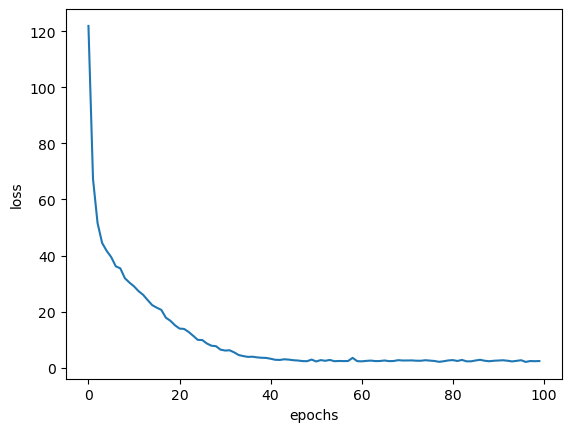

1/1 [==============================] - 0s 55ms/step


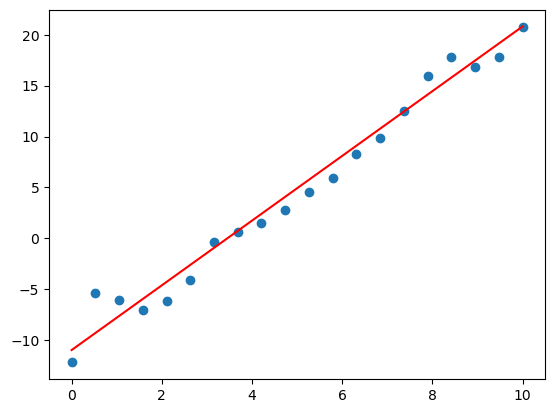

In [1]:
#1201
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##def dataset(train_size=100): # numpy
##     np.random.seed(1)
##     x = np.linspace(0.0, 10.0, num=train_size)
####     y = x**3 + x**2 + x + 4.0
##     y = 3.0*x - 10.0
####     y+= np.random.randn(train_size)*2.0
##     y += np.random.normal(loc=0.0, scale=2.0, size=train_size)
##     return x, y

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(0.0, 10.0, num=train_size)
##     y = x**3 + x**2 + x + 4.0
     y = 3.0*x - 10.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 2.0)
     return x, y
x, y_true = dataset(20)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
##model.add(tf.keras.layers.Dense(units=1, input_shape=(1,))) # [1]
##model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=(1,))])
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'
##model.compile(optimizer='sgd', loss='mse') # 'sgd', 'adam', 'rmsprop'

# 0: silent, 1:progress bar,  2: one line per epoch 
ret = model.fit(x, y_true, epochs=100, batch_size=4, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights, bias
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 - 0s - loss: 16.7556 - 157ms/epoch - 78ms/step
Epoch 2/100
2/2 - 0s - loss: 5.4622 - 3ms/epoch - 2ms/step
Epoch 3/100
2/2 - 0s - loss: 2.4057 - 3ms/epoch - 1ms/step
Epoch 4/100
2/2 - 0s - loss: 1.2966 - 3ms/epoch - 1ms/step
Epoch 5/100
2/2 - 0s - loss: 0.8924 - 3ms/epoch - 1ms/step
Epoch 6/100
2/2 - 0s - loss: 0.7661 - 3ms/epoch - 2ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6675 - 3ms/epoch - 2ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6215 - 3ms/epoch - 1ms/step
Epoch 9/100
2/2 - 0s - loss: 0.5687 - 3ms/epoch - 1ms/step
Epoch 10/100
2/2 - 0s - loss: 0.5267 - 3ms/epoch - 2m

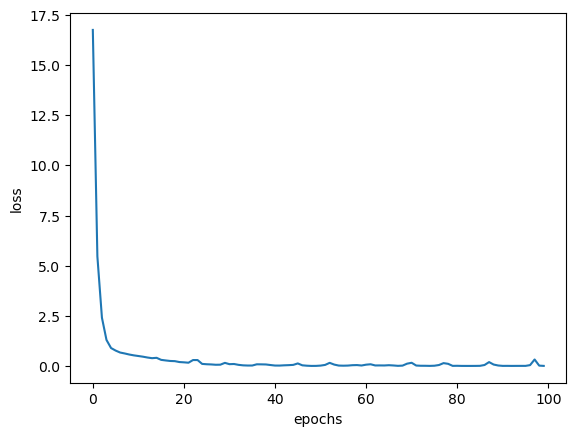

In [2]:
#1202
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_data = np.array([ # t = 1*x0 + 2*x1 + 3
#  x0, x1, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X      = train_data[:, :-1]
y_true = train_data[:, -1:]  # t
##y_true += np.reshape(np.random.randn(len(y_true))*2.0, (-1, 1)) 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2)) # input_shape=(2,)
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'
##model.compile(optimizer='sgd', loss='mse') # 'sgd', 'adam', 'rmsprop'

# 0: silent, 1:progress bar,  2: one line per epoch 
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2)
y_pred = model.predict(X)
print("y_pred:", y_pred)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].weights[1].numpy()) # model.layers[0].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


x =  tf.Tensor(
[-5.         -4.4736843  -3.9473684  -3.4210525  -2.8947368  -2.368421
 -1.8421052  -1.3157892  -0.78947353 -0.26315784  0.26315784  0.789474
  1.3157897   1.8421054   2.3684216   2.8947372   3.421053    3.9473686
  4.4736843   5.        ], shape=(20,), dtype=float32)
y_true =  tf.Tensor(
[-359.03662   -182.68039   -141.79495   -122.51947    -91.64525
  -56.439613    -7.173898    -6.7850804  -13.763784   -17.795649
  -14.323437   -13.938602     5.161852    21.287455    62.92095
  129.681      189.33395    222.98691    307.5177     445.19977  ], shape=(20,), dtype=float32)
X =  [[ 1.00000000e+00 -5.00000000e+00  2.50000000e+01 -1.25000000e+02]
 [ 1.00000000e+00 -4.47368431e+00  2.00138512e+01 -8.95356522e+01]
 [ 1.00000000e+00 -3.94736838e+00  1.55817175e+01 -6.15067787e+01]
 [ 1.00000000e+00 -3.42105246e+00  1.17035999e+01 -4.00386276e+01]
 [ 1.00000000e+00 -2.89473677e+00  8.37950134e+00 -2.42564487e+01]
 [ 1.00000000e+00 -2.36842108e+00  5.60941839e+00 -1.32854652e+01

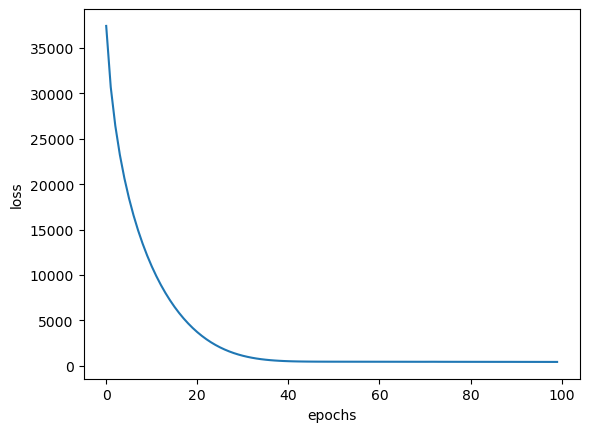

1/1 [==============================] - 0s 27ms/step


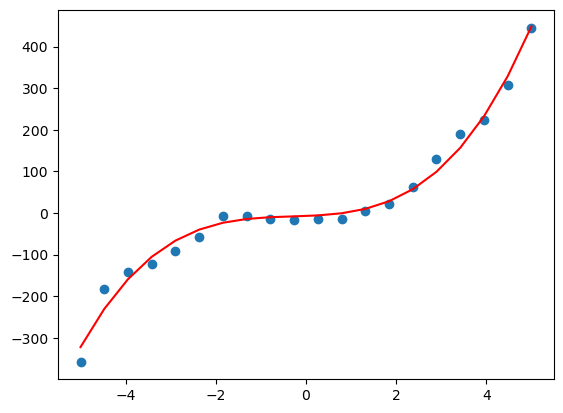

In [6]:
#1203
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)
##x /= max(x)       # 정규화
##y_true /= max(y_true)
print('x = ', x)
print('y_true = ', y_true)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i
print("X = ", X)
model=tf.keras.Sequential(
        [tf.keras.layers.Dense(units=1, use_bias=False,input_shape=(n+1,))])
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)
print("len(model.layers):", len(model.layers)) # 1

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[0].weights[0].numpy())

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 0s - loss: 36.8420 - 172ms/epoch - 34ms/step
Epoch 2/100
5/5 - 0s - loss: 32.2519 - 5ms/epoch - 1ms/step
Epoch 3/100
5/5 - 0s - loss: 28.1241 - 5ms/epoch - 1ms/step
Epoch 4/100
5/5 - 0s - loss: 26.4747 - 5ms/epoch - 996us/step
Epoch 5/100
5/5 - 0s - loss: 24.5386 - 5ms/epoch - 1000us/step
Epoch 6/100
5/5 - 0s - loss: 23.8561 - 7ms/epoch - 1ms/step
Epoch 7/100
5/5 - 0s - loss: 21.1194 - 4ms/epoch - 795us/step
Epoch 8/100
5/5 - 0s - loss: 21.0

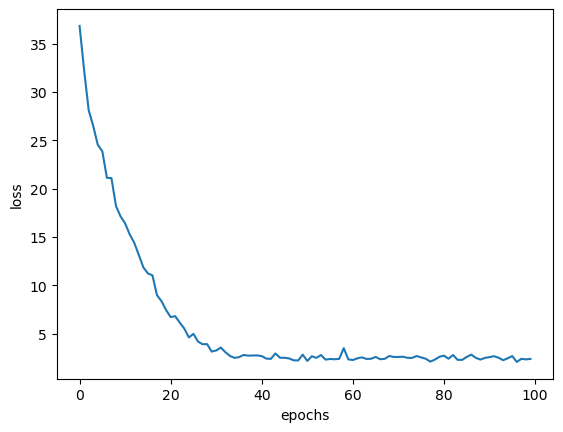

1/1 [==============================] - 0s 32ms/step


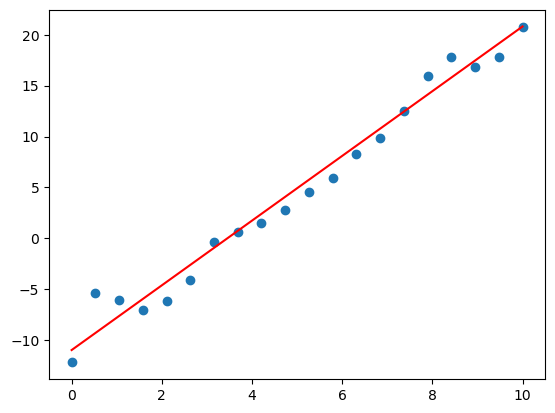

In [7]:
#1301
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(0.0, 10.0, num=train_size)
     y = 3.0*x - 10.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 2.0)
     return x, y
x, y_true = dataset(20)

inputs = tf.keras.layers.Input(shape=(1,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(1,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) # 'rmsprop'
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

ret = model.fit(x, y_true, epochs=100, batch_size=4, verbose=2) #2: one line per epoch 
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights, bias
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true)
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red')
plt.show()


In [ ]:
#1302
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_data = np.array([ # t = 1*x0 + 2*x1 + 3
#  x0, x1, t      
 [ 1,  0,  4],
 [ 2,  0,  5],
 [ 3,  0,  6],
 [ 4,  0,  7],
 [ 1,  1,  6],
 [ 2,  1,  7],
 [ 3,  1,  8],
 [ 4,  1,  9]], dtype=np.float32)

X      = train_data[:, :-1]
y_true = train_data[:, -1:]  # t
##y_true += np.reshape(np.random.randn(len(y_true))*2.0, (-1, 1)) 

inputs = tf.keras.layers.Input(shape=(2,))
##y = tf.keras.layers.Dense(units=1)  # ,input_shape=(2,))
##outputs = y(inputs)
outputs = tf.keras.layers.Dense(units=1)(inputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

##opt = tf.keras.optimizers.SGD(learning_rate=0.01)  # optimizer='sgd'
##opt = tf.keras.optimizers.Adam(learning_rate=0.01) # 'adam'
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) # 'rmsprop'
model.compile(optimizer=opt, loss='mse') # 'mean_squared_error'

ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=2) # 2: one line per epoch
y_pred = model.predict(X)
print("y_pred:", y_pred)
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())
print("weights:", model.layers[1].weights[0].numpy())
print("bias:", model.layers[1].weights[1].numpy()) # model.layers[1].bias.numpy()

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [ ]:
#1303
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)
##x /= max(x)       # 정규화
##y_true /= max(y_true)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
##X[:, 0] = 1.0
##X[:, 1] = x
##X[:, 2] = x**2
##X[:, 3] = x**3
for i in range(1, n+1):
     X[:, i] = x**i

inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)
print("len(model.layers):", len(model.layers)) # 2

loss = ret.history['loss']
print("loss:", loss[-1])
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()


In [ ]:
#1401
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y

x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)

#1: 모델 전체 저장
import os
if not os.path.exists("./RES"):
     os.mkdir("./RES")
model.save("./RES/1401.h5")   # HDF5, keras format

#2: 모델 구조 저장
json_string = model.to_json()
import json
file = open("./RES/1401.model", 'w')
json.dump(json_string, file)
file.close()
 
#3: 가중치 저장
model.save_weights("./RES/weights/1401")
 
#4: 학습중에 체크포인트 저장
filepath = "RES/ckpt/1401-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
              filepath, verbose=0, save_weights_only=True, save_freq=50)
ret = model.fit(X, y_true, epochs=100, callbacks = [cp_callback], verbose=0)


In [ ]:
#1402
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i
     
#1: 모델 전체 로드
model = tf.keras.models.load_model("./RES/1401.h5")

#2: 모델 평가, 예측, 그래프 표시
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)

print("len(model.layers):", len(model.layers)) # 2
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

#3: 예측, 그래프 표시
plt.scatter(x, y_true) 
y_pred = model.predict(X)
plt.plot(x, y_pred, color='red')
plt.show()



In [ ]:
#1403
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

##inputs = tf.keras.layers.Input(shape=(n+1,))
##outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
##model = tf.keras.Model(inputs=inputs, outputs=outputs)
##model.summary()

#1: 모델 구조 로드
import json
file = open("./RES/1401.model", 'r')
json_model = json.load(file)
file.close()
model = tf.keras.models.model_from_json(json_model)
model.summary()

#2
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')

#3
model.load_weights("./RES/weights/1401")    # 가중치 로드 
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)
print("len(model.layers):", len(model.layers)) # 1
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

#4
y_pred = model.predict(X)
plt.scatter(x, y_true) 
plt.plot(x, y_pred, color='red')
plt.show()


In [ ]:
#1404
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

##inputs = tf.keras.layers.Input(shape=(n+1,))
##outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
##model = tf.keras.Model(inputs=inputs, outputs=outputs)
##model.summary()

#1: 모델 구조 로드
import json
file = open("./RES/1401.model", 'r')
json_model = json.load(file)
file.close()
model = tf.keras.models.model_from_json(json_model)
model.summary()

#2
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')

#3
latest = tf.train.latest_checkpoint("./RES/ckpt")
print('latest=', latest)
model.load_weights(latest) # 가중치 로드 
loss = model.evaluate(X, y_true, verbose=0) # 0 = silent
print("loss:", loss)
print("len(model.layers):", len(model.layers)) # 2
#print(model.get_weights())  # weights
print("weights:", model.layers[1].weights[0].numpy())

#4
y_pred = model.predict(X)
plt.scatter(x, y_true) 
plt.plot(x, y_pred, color='red')
plt.show()


In [ ]:
#1405
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

inputs = tf.keras.layers.Input(shape=(n+1,))
outputs = tf.keras.layers.Dense(units=1, use_bias=False)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
ret = model.fit(X, y_true, epochs=100, verbose=2)

#모델 동결(Freezing)
#ref1: https://github.com/leimao/Frozen_Graph_TensorFlow/blob/master/TensorFlow_v2/test.py
#ref2: https://leimao.github.io/blog/Save-Load-Inference-From-TF2-Frozen-Graph/

#1: 모델을 하나의 시스니쳐를 갖는 ConcreteFunction으로 변환
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
        tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

#2: 동결함수 생성
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
frozen_func = convert_variables_to_constants_v2(full_model)

#3: 동결 그래프(frozen graph) 저장
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                      logdir="./RES",
                      name="frozen_graph.pb",
                      as_text=False)

#4: 모델구조 화면출력
##print(frozen_func.graph.as_graph_def())
##
##layers = [op.name for op in frozen_func.graph.get_operations()]
##print("-"* 20)
##print("model layers: ")
##for layer in layers:
##     print(layer)
##
##print("-" * 20)
##print("model inputs: ")
##print(frozen_func.inputs)
##print("model outputs: ")
##print(frozen_func.outputs)


In [ ]:
#1406
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 # pip install opencv-contrib-python

def dataset(train_size=100): # tensorflow    
     tf.random.set_seed(1)
     x = tf.linspace(-5.0, 5.0, num=train_size)
     y = 3.0*x**3 + 2.0*x**2 + x + 4.0
     y += tf.random.normal([train_size], mean=0.0, stddev = 30.0)
     return x, y
x, y_true = dataset(20)

# n-차 다항식 회귀
n = 3
X = np.ones(shape = (len(x), n+1), dtype=np.float32)
for i in range(1, n+1):
     X[:, i] = x**i

#텐서플로 모델, 학습결과 로드
fname = "./RES/frozen_graph.pb"
net =cv2.dnn.readNetFromTensorflow(fname)
##net =cv2.dnn.readNetFromTensorflow(np.fromfile(fname, dtype=np.uint8))#한글 path
##for xx in X:
##    blob = cv2.dnn.blobFromImage(xx)
##    net.setInput(blob)
##    res = net.forward()
##    print(xx, res)
     
blob = cv2.dnn.blobFromImages(X) # blob.shape = (20, 1, 4, 1)
net.setInput(blob) 
y_pred = net.forward()

plt.scatter(x, y_true) 
plt.plot(x, y_pred, color='red')
plt.show()
